# School Activities

**Important Notes**
- This is an initial analysis on the available data, some results may change depending on the insights in the future
- Only used data for 2019 and computed the mean/average of the scores given by all the assessors and validators except for the Kruskal Wallis test to find out how the type of assessor affects performance/evaluation scores/rating
- Used the following scoring system (followed the previous analysis' scoring):

|Levels of Performance|Label|Range|
|:------|:------|:------|
|Achieved Standards     |A     |7     |
|Progressing     |B     |greater than 4 but less than 7     |
|Approaching     |C     |greater than 2 but less than or equal to 4     |
|Acquiring     |D     |less than or equal to 2    |


# Step 1 : Load libraries

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
import scipy.stats as ss
from collections import Counter
import math 
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute


# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Step 2: Read and transform data

In [2]:
# Reading the data on which analysis needs to be done
df_main = pd.read_excel("SEED2019_RawData_yoy.xlsx", sheet_name='consolidated_data')
df_main.head()

,raw_score,Acquiring,Approaching,Progressing,Achieved Standards,Sort_PerformanceCode,2016-2018with Site Validation,2017-2018 with Site Validation,Comparison 2016-2018,Comparison 2017-2018,...,performance_value,evaluator_id,round_num,Comparison 2016-2019,Comparison 2017-2019,2019_concat_Name,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,7,0,0,0,1,4,1.0,1.0,3.0,2.0,...,4,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,2019_concat_Name
1,5,0,0,1,0,3,1.0,1.0,3.0,2.0,...,3,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN
2,5,0,0,1,0,3,1.0,1.0,3.0,2.0,...,3,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN
3,7,0,0,0,1,4,1.0,1.0,3.0,2.0,...,4,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN
4,7,0,0,0,1,4,1.0,1.0,3.0,2.0,...,4,34501,Community Assessment,4,3,ElementaryABLAYAN ESDalaguete II,NaN,NaN,NaN,NaN


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589365 entries, 0 to 589364
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   raw_score                       589365 non-null  int64  
 1   Acquiring                       589365 non-null  int64  
 2   Approaching                     589365 non-null  int64  
 3   Progressing                     589365 non-null  int64  
 4   Achieved Standards              589365 non-null  int64  
 5   Sort_PerformanceCode            589365 non-null  int64  
 6   2016-2018with Site Validation   85598 non-null   float64
 7   2017-2018 with Site Validation  85598 non-null   float64
 8   Comparison 2016-2018            362088 non-null  float64
 9   Comparison 2017-2018            362088 non-null  float64
 10  allSchools                      589365 non-null  object 
 11  allschools_year                 589365 non-null  object 
 12  2018_concatSchoo

In [4]:
#transform data
df_main = df_main[df_main['Year'] == 2019]
df_main = df_main[['school_name', 'Year', 'indicator', 'raw_score']]
df_main = df_main.groupby(['school_name', 'Year', 'indicator']).mean('raw_score').reset_index()
df_main = df_main.pivot(index='school_name', columns='indicator', values='raw_score').reset_index()

In [5]:
# extract only columns to use
numcols = [
        'Cohort Survival Rate',  'Completion Rate', 'Drop-out Rate', 
        'Promotion Rate', 'Repetition Rate', 'School Activities', 'Innovations to Improve School Performance Indicators',
        'Alignment of the Instructional Plan',
       'Assessment of student performance', 'Asset Monitoring System',
       'Budgeting Process', 'Classroom Management and Professionalism',
       'Classroom Structure',
       'Clean and Green: Policies, Plans and Programs',
       'Communication Skills (Written)',
       'Communication and Presentation Skills (Oral)',
       'Concepts and Skills Development', 'Data Management System',
       'Enhanced School Improvement Plan vs. Vision-Mission-Goals',
       'Financial Procedures and Protocols',
       'Guidance Counseling and Health Clinic',
       'Implementation of Instructional Intervention',
       'Instructional Assessment System', 'Instructional Materials',
       'Integration of Education Trends',
       'Investment Program v.v. Priority Programs and Projects',
       'Lesson Delivery', 'Organizational Framework',
       'Partnership and Linkages', 'Plan and Implementation',
       'Preparation', 'Priority Improvement Areas vs. ESIP',
       'Programs and Projects: Accomplishments',
       'Programs and Projects: Monitoring and Evaluation',
        'Recording of Financial Transactions',
       'Relevance of the Instructional Plan', 
       'Reporting of Financial Condition',
       'Resource mobilization projects and activities',
       'Safety and Security: Policies, Plans and Programs',
       'School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)',
       'School Governing Council By-laws',
       'School Governing Council Functionality',
       'School Policies: Documentation and Dissemination',
       'School Policies: Implementation', 'School Processes',
       'Staff Assessment System', 'Student Motivation and Participation',
       'Teacher Competence']
catcols = []

In [6]:
df = df_main[numcols+catcols]

In [7]:
traindf = df[numcols]
#traindf = pd.concat([df[numcols], pd.get_dummies(df[catcols])],axis=1)

In [8]:
# get features
features = traindf.columns
# drop blank
traindf = traindf.dropna()

In [9]:
traindf = pd.DataFrame(traindf,columns=features)

In [10]:
ind_var = 'School Activities'

In [11]:
y = traindf[ind_var]
X = traindf.copy()
X.drop(['Cohort Survival Rate',  'Completion Rate', 'Drop-out Rate', 
        'Promotion Rate', 'Repetition Rate', 'School Activities', 
        'Innovations to Improve School Performance Indicators'], axis=1, inplace=True)

In [12]:
X.head()

indicator,Alignment of the Instructional Plan,Assessment of student performance,Asset Monitoring System,Budgeting Process,Classroom Management and Professionalism,Classroom Structure,"Clean and Green: Policies, Plans and Programs",Communication Skills (Written),Communication and Presentation Skills (Oral),Concepts and Skills Development,...,"Safety and Security: Policies, Plans and Programs","School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)",School Governing Council By-laws,School Governing Council Functionality,School Policies: Documentation and Dissemination,School Policies: Implementation,School Processes,Staff Assessment System,Student Motivation and Participation,Teacher Competence
0,5.571429,5.285714,3.857143,4.142857,5.285714,5.285714,4.714286,5.285714,4.428571,4.714286,...,5.000000,3.000000,4.428571,5.285714,5.000000,5.000000,4.714286,4.142857,3.857143,5.285714
1,7.000000,7.000000,7.000000,7.000000,6.200000,7.000000,7.000000,7.000000,7.000000,6.600000,...,7.000000,7.000000,6.200000,7.000000,7.000000,5.800000,6.600000,7.000000,7.000000,6.600000
2,3.000000,3.000000,3.666667,3.666667,3.000000,3.666667,4.333333,3.000000,3.000000,3.000000,...,3.666667,3.666667,3.000000,3.000000,3.666667,3.666667,3.000000,3.000000,3.000000,3.000000
3,6.600000,6.600000,1.800000,1.800000,6.600000,6.600000,3.000000,5.000000,6.600000,6.600000,...,3.400000,3.400000,1.800000,1.800000,5.000000,5.000000,4.200000,3.400000,6.600000,6.600000
4,5.000000,3.000000,3.000000,3.000000,3.666667,3.000000,5.000000,4.333333,5.000000,3.000000,...,3.000000,3.666667,3.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
len(X.columns)

41

### Set some parameters

In [14]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=10

# Step 3: Feature Selection/Importance

## 1. Pearson Correlation

This is a filter-based method.  We check the absolute value of the Pearson's correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [15]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [16]:
cor_feature

['Communication Skills (Written)',
 'Plan and Implementation',
 'Financial Procedures and Protocols',
 'Resource mobilization projects and activities',
 'Instructional Assessment System',
 'School Policies: Documentation and Dissemination',
 'Staff Assessment System',
 'Asset Monitoring System',
 'Guidance Counseling and Health Clinic',
 'Safety and Security: Policies, Plans and Programs']

<AxesSubplot:xlabel='indicator', ylabel='indicator'>

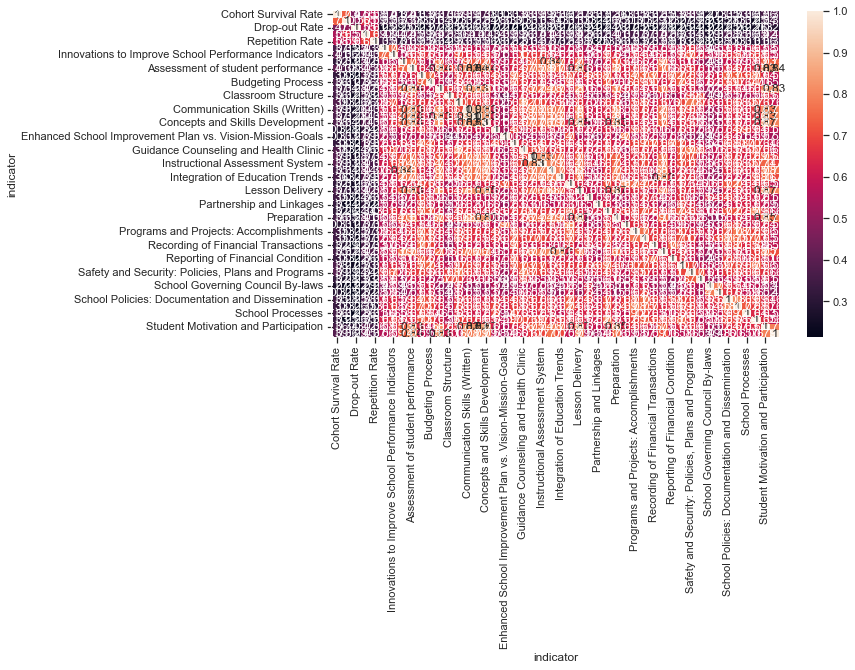

In [17]:
# visualize
cor = df.corr()

# heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)

## 2. Chi-Square Features

This is another filter-based method.  In this method, we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)

Y=y.astype('int')

chi_selector.fit(X_norm, Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [19]:
chi_feature

['Budgeting Process',
 'Clean and Green: Policies, Plans and Programs',
 'Guidance Counseling and Health Clinic',
 'Partnership and Linkages',
 'Plan and Implementation',
 'Programs and Projects: Accomplishments',
 'Resource mobilization projects and activities',
 'Safety and Security: Policies, Plans and Programs',
 'School Policies: Implementation',
 'School Processes']

In [20]:
names = X.columns.values[chi_selector.get_support()]
scores = chi_selector.scores_[chi_selector.get_support()]

In [21]:
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                                          Feat_names   F_Scores
2              Guidance Counseling and Health Clinic  47.910226
6      Resource mobilization projects and activities  46.677380
3                           Partnership and Linkages  46.287590
7  Safety and Security: Policies, Plans and Programs  45.645617
8                    School Policies: Implementation  44.540274
1      Clean and Green: Policies, Plans and Programs  43.631672
9                                   School Processes  43.033367
5             Programs and Projects: Accomplishments  41.309150
0                                  Budgeting Process  40.997130
4                            Plan and Implementation  39.685544


## 3. Recursive Feature Elimination

This is a wrapper based method. As I said before, wrapper methods consider the selection of a set of features as a search problem.  From sklearn Documentation:

    The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

As you would have guessed we could use any estimator with the method. In this case, we use LogisticRegression and the RFE observes the coef_ attribute of the LogisticRegression object

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(random_state=123), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, Y)

Fitting estimator with 41 features.
Fitting estimator with 31 features.
Fitting estimator with 21 features.


C:\Users\Morax\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Morax\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fitting estimator with 11 features.


C:\Users\Morax\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(random_state=123), n_features_to_select=10,
    step=10, verbose=5)

In [23]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

10 selected features


In [24]:
rfe_feature

['Asset Monitoring System',
 'Enhanced School Improvement Plan vs. Vision-Mission-Goals',
 'Financial Procedures and Protocols',
 'Guidance Counseling and Health Clinic',
 'Instructional Assessment System',
 'Reporting of Financial Condition',
 'Safety and Security: Policies, Plans and Programs',
 'School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)',
 'School Processes',
 'Staff Assessment System']

## 4. Lasso: SelectFromModel

This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.  For example, Lasso, and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.  Here we use Lasso to select variables.

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", random_state=123), max_features=num_feats)
embeded_lr_selector.fit(X_norm, Y)

C:\Users\Morax\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(random_state=123), max_features=10)

In [26]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

10 selected features


In [27]:
embeded_lr_feature

['Asset Monitoring System',
 'Enhanced School Improvement Plan vs. Vision-Mission-Goals',
 'Financial Procedures and Protocols',
 'Guidance Counseling and Health Clinic',
 'Implementation of Instructional Intervention',
 'Priority Improvement Areas vs. ESIP',
 'Reporting of Financial Condition',
 'Safety and Security: Policies, Plans and Programs',
 'School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)',
 'School Processes']

## 5. Tree-based: SelectFromModelm

This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods. We can also use RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=123), max_features=num_feats)
embeded_rf_selector.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier(random_state=123),
                max_features=10)

In [29]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [30]:
embeded_rf_feature

['Assessment of student performance',
 'Asset Monitoring System',
 'Financial Procedures and Protocols',
 'Guidance Counseling and Health Clinic',
 'Partnership and Linkages',
 'Plan and Implementation',
 'Programs and Projects: Monitoring and Evaluation',
 'Resource mobilization projects and activities',
 'Safety and Security: Policies, Plans and Programs',
 'Staff Assessment System']

We could also have used a LightGBM. Or an XGBoost object as long it has a featureimportances attribute.

In [31]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

import re
X_renamed = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40, random_state=123)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X_renamed, Y)

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, random_state=123,
                                         reg_alpha=3, reg_lambda=1),
                max_features=10)

In [32]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

10 selected features


In [33]:
embeded_lgb_feature

['Alignment of the Instructional Plan',
 'Clean and Green: Policies, Plans and Programs',
 'Enhanced School Improvement Plan vs. Vision-Mission-Goals',
 'Financial Procedures and Protocols',
 'Plan and Implementation',
 'Programs and Projects: Accomplishments',
 'Safety and Security: Policies, Plans and Programs',
 'School Facilities (Computer Room, Home Economics Room, Learning Resource Center, Library, Admin Bldg., WatSan, Perimeter Fence, Playground, Canteen, Feeding Center)',
 'School Governing Council By-laws',
 'Staff Assessment System']

## Combine all feature selection methods

In [34]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 10
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

C:\Users\Morax\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,"Safety and Security: Policies, Plans and Programs",True,True,True,True,True,True,6
2,Guidance Counseling and Health Clinic,True,True,True,True,True,False,5
3,Financial Procedures and Protocols,True,False,True,True,True,True,5
4,Staff Assessment System,True,False,True,False,True,True,4
5,Plan and Implementation,True,True,False,False,True,True,4
6,Asset Monitoring System,True,False,True,True,True,False,4
7,School Processes,False,True,True,True,False,False,3
8,"School Facilities (Computer Room, Home Economi...",False,False,True,True,False,True,3
9,Resource mobilization projects and activities,True,True,False,False,True,False,3
10,Enhanced School Improvement Plan vs. Vision-Mi...,False,False,True,True,False,True,3


In [35]:
feature = ['Safety and Security: Policies, Plans and Programs',
           'Guidance Counseling and Health Clinic', 'Financial Procedures and Protocols', 
           'Staff Assessment System', 'Plan and Implementation', 'Asset Monitoring System']

# Step 4: Cross Validation using Regression Algorithms

In [36]:
# Import Lab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from scipy import optimize, stats   
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#from keras.utils import np_utils

### Data Preparation

In [37]:
# Duplicate dataframe
df = df_main.copy()

In [38]:
# Drop rows with missing values
df = df.dropna()
df.shape

(1088, 49)

In [39]:
df_pred = df[feature]

In [40]:
df_pred.head()

indicator,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
0,5.000000,3.857143,4.428571,4.142857,4.428571,3.857143
1,7.000000,6.600000,7.000000,7.000000,7.000000,7.000000
2,3.666667,3.666667,3.666667,3.000000,3.000000,3.666667
3,3.400000,3.400000,3.800000,3.400000,5.000000,1.800000
4,3.000000,5.000000,3.000000,5.000000,5.000000,3.000000


In [41]:
# transform the attibutes to normalize
df_log = df_pred.apply(np.log, axis = 1).round(3)
df_log.head()

indicator,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
0,1.609,1.350,1.488,1.421,1.488,1.350
1,1.946,1.887,1.946,1.946,1.946,1.946
2,1.299,1.299,1.299,1.099,1.099,1.299
3,1.224,1.224,1.335,1.224,1.609,0.588
4,1.099,1.609,1.099,1.609,1.609,1.099


In [42]:
df_log.describe()

indicator,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,1.451221,1.441780,1.537578,1.519756,1.479073,1.500531
std,0.404943,0.443712,0.357043,0.364146,0.392756,0.342897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.253000,1.175000,1.299000,1.299000,1.299000,1.299000
50%,1.609000,1.609000,1.609000,1.609000,1.609000,1.609000
75%,1.735000,1.735000,1.825000,1.792000,1.758000,1.735000
max,1.946000,1.946000,1.946000,1.946000,1.946000,1.946000


In [43]:
# Rescale the attributes
df_final = df_log[feature]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_final)
df_scaled.shape

(1088, 6)

In [44]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = feature
df_scaled.head()

,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
0,0.389813,-0.206942,-0.138921,-0.271325,0.022741,-0.439201
1,1.222412,1.003860,1.144428,1.171067,1.189396,1.299731
2,-0.376079,-0.321934,-0.668513,-1.155992,-0.968152,-0.588002
3,-0.561376,-0.491041,-0.567639,-0.812565,0.330962,-2.662466
4,-0.870204,0.377039,-1.228928,0.245189,0.330962,-1.171536


### Modelling

In [45]:
X = df_scaled.copy()
y = df[ind_var]

In [46]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)

In [47]:
# Let's now take a look at the train dataset
X_train.head()

,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
578,-0.376079,0.054609,0.788564,0.591363,0.496535,0.316476
91,-1.322327,-0.125771,-1.228928,-0.367484,-0.968152,-0.722215
170,-0.376079,0.054609,-0.797408,-0.367484,-1.434305,-0.334165
272,0.701111,0.054609,-0.200567,-0.147691,-0.033300,-0.100751
75,0.036514,0.661138,0.553190,0.797419,-0.033300,1.007964


In [48]:
Y_train.head()

582    3.545455
92     3.500000
174    3.000000
276    7.000000
76     3.000000
Name: School Activities, dtype: float64

In [49]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(761, 6)
(327, 6)
(761,)
(327,)


In [50]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

reference: https://towardsdatascience.com/7-of-the-most-commonly-used-regression-algorithms-and-how-to-choose-the-right-one-fc3c8890f9e3#b419

## 1. ExtraTrees Regressor

In [51]:
model = ExtraTreesRegressor()

In [52]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [53]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: -1.114 (2.581)
Mean MAE: -0.793 (2.581)
Mean r2: 0.403 (2.581)


## 2. AdaBoost Regressor

In [54]:
model = AdaBoostRegressor()

In [55]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [56]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: -0.977 (2.581)
Mean MAE: -0.775 (2.581)
Mean r2: 0.470 (2.581)


## 3. Bayesian Ridge

In [57]:
%time
BYNR = linear_model.BayesianRidge()
BYNR.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, BYNR.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, BYNR.predict(X_test)))
print('Test set score:', BYNR.score(X_train,Y_train))

Wall time: 0 ns
Train set mse: 0.9393501256614893
Test set mse: 0.868542805519744
Test set score: 0.51183561386691


In [58]:
model = linear_model.BayesianRidge()

In [59]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [60]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: -0.934 (2.581)
Mean MAE: -0.753 (2.581)
Mean r2: 0.495 (2.581)


## 4. Linear Regression

In [61]:
%time
LR = LinearRegression()
LR.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, LR.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, LR.predict(X_test)))
print('Test set score:', LR.score(X_train,Y_train))

Wall time: 0 ns
Train set mse: 0.939266724491972
Test set mse: 0.8679589393756033
Test set score: 0.5118789560453033


In [62]:
model = LinearRegression()

In [63]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [64]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: -0.935 (2.581)
Mean MAE: -0.753 (2.581)
Mean r2: 0.494 (2.581)


## 5. Random Forest Regressor

In [65]:
%time
RFR = RandomForestRegressor(n_estimators = 100)
RFR.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, RFR.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, RFR.predict(X_test)))
print('Test set score:', RFR.score(X_train,Y_train))

Wall time: 0 ns
Train set mse: 0.1961830388454621
Test set mse: 0.9328533697800047
Test set score: 0.8980469900291137


In [66]:
model = RandomForestRegressor()

In [67]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [68]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: -1.052 (2.581)
Mean MAE: -0.777 (2.581)
Mean r2: 0.435 (2.581)


## 6. XGB Regressor

In [69]:
%time
XGB = XGBRegressor(max_depth=16,n_estimators=200,seed=123)
XGB.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, XGB.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, XGB.predict(X_test)))
print('Test set score:', XGB.score(X_train,Y_train))

Wall time: 0 ns
Train set mse: 0.06015606209466165
Test set mse: 1.1709723885612575
Test set score: 0.9687379111128079


In [70]:
model = XGBRegressor()

In [71]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [72]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: -1.285 (2.581)
Mean MAE: -0.858 (2.581)
Mean r2: 0.304 (2.581)


## 7. LGBM Regressor

In [73]:
%time

import re
X_train_renamed = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

LGBM = LGBMRegressor(max_depth=16,n_estimators=200,seed=1)
LGBM.fit(X_train_renamed,Y_train)


print('Train set mse:', mean_squared_error(Y_train, LGBM.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, LGBM.predict(X_test)))
print('Test set score:', LGBM.score(X_train,Y_train))

Wall time: 0 ns
Train set mse: 0.23533303965377972
Test set mse: 1.0106175913123348
Test set score: 0.8777013962088712


In [74]:
model = LGBMRegressor()

In [75]:
# evaluate model
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [76]:
print('Mean MSE: %.3f (%.3f)' % (scores_mse.mean(), scores.std()) )
print('Mean MAE: %.3f (%.3f)' % (scores_mae.mean(), scores.std()) )
print('Mean r2: %.3f (%.3f)' % (scores_r2.mean(), scores.std()) )

Mean MSE: nan (2.581)
Mean MAE: nan (2.581)
Mean r2: nan (2.581)


# Step 5: Cross Validation using Classification Algorithms

### Data Preparation

In [77]:
df2 = df_main.copy()

In [78]:
# Drop rows with missing values
df2 = df.dropna()
df2.shape

(1088, 49)

In [79]:
df2[ind_var] = np.where(df2[ind_var] >= 7, "A", 
                            np.where(df2[ind_var] >= 5, "B", 
                            np.where(df2[ind_var] >= 3, "C", 
                            np.where(df2[ind_var] >= 1, "D", "None"))))

In [80]:
df2[ind_var].value_counts()

B    601
C    294
A    128
D     65
Name: School Activities, dtype: int64

In [81]:
df2_pred = df2[feature]

In [82]:
df2_pred.head()

indicator,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
0,5.000000,3.857143,4.428571,4.142857,4.428571,3.857143
1,7.000000,6.600000,7.000000,7.000000,7.000000,7.000000
2,3.666667,3.666667,3.666667,3.000000,3.000000,3.666667
3,3.400000,3.400000,3.800000,3.400000,5.000000,1.800000
4,3.000000,5.000000,3.000000,5.000000,5.000000,3.000000


In [83]:
# transform the attibutes to normalize
df2_log = df2_pred.apply(np.log, axis = 1).round(3)
df2_log.head()

indicator,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
0,1.609,1.350,1.488,1.421,1.488,1.350
1,1.946,1.887,1.946,1.946,1.946,1.946
2,1.299,1.299,1.299,1.099,1.099,1.299
3,1.224,1.224,1.335,1.224,1.609,0.588
4,1.099,1.609,1.099,1.609,1.609,1.099


In [84]:
df2_log.describe()

indicator,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,1.451221,1.441780,1.537578,1.519756,1.479073,1.500531
std,0.404943,0.443712,0.357043,0.364146,0.392756,0.342897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.253000,1.175000,1.299000,1.299000,1.299000,1.299000
50%,1.609000,1.609000,1.609000,1.609000,1.609000,1.609000
75%,1.735000,1.735000,1.825000,1.792000,1.758000,1.735000
max,1.946000,1.946000,1.946000,1.946000,1.946000,1.946000


In [85]:
# Rescale the attributes
df2_final = df2_log[feature]

# Instantiate
scaler = StandardScaler()

# fit_transform
df2_scaled = scaler.fit_transform(df2_final)
df2_scaled.shape

(1088, 6)

In [86]:
df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = feature
df2_scaled.head()

,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
0,0.389813,-0.206942,-0.138921,-0.271325,0.022741,-0.439201
1,1.222412,1.003860,1.144428,1.171067,1.189396,1.299731
2,-0.376079,-0.321934,-0.668513,-1.155992,-0.968152,-0.588002
3,-0.561376,-0.491041,-0.567639,-0.812565,0.330962,-2.662466
4,-0.870204,0.377039,-1.228928,0.245189,0.330962,-1.171536


### Modelling

In [87]:
X = df2_scaled.copy()
y = df2[ind_var]

In [88]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)

In [89]:
# Let's now take a look at the train dataset
X_train.head()

,"Safety and Security: Policies, Plans and Programs",Guidance Counseling and Health Clinic,Financial Procedures and Protocols,Staff Assessment System,Plan and Implementation,Asset Monitoring System
578,-0.376079,0.054609,0.788564,0.591363,0.496535,0.316476
91,-1.322327,-0.125771,-1.228928,-0.367484,-0.968152,-0.722215
170,-0.376079,0.054609,-0.797408,-0.367484,-1.434305,-0.334165
272,0.701111,0.054609,-0.200567,-0.147691,-0.033300,-0.100751
75,0.036514,0.661138,0.553190,0.797419,-0.033300,1.007964


In [90]:
Y_train.head()

582    C
92     C
174    C
276    A
76     C
Name: School Activities, dtype: object

In [91]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(761, 6)
(327, 6)
(761,)
(327,)


In [92]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## 1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

In [94]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

62.68 accuracy with a standard deviation of 4.33


## 2. Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [96]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

53.98 accuracy with a standard deviation of 4.97


## 4. Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [98]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

60.81 accuracy with a standard deviation of 4.99


## 4. Support Vector Machine

In [99]:
from sklearn.svm import SVC
model = SVC(random_state=42)

In [100]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

62.86 accuracy with a standard deviation of 5.48


## 5. K-Nearest Neighbour (KNN)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [102]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

59.37 accuracy with a standard deviation of 4.81


## 6. Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
model = KNeighborsClassifier()

In [104]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()*100))

59.37 accuracy with a standard deviation of 4.81


In [105]:
print('The end.')

The end.
